<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

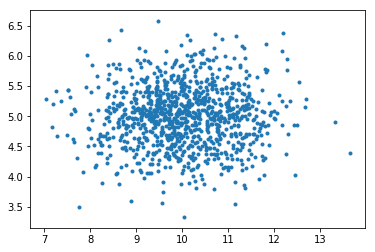

In [10]:
mu1 = 10
sigma1 = 1

mu2 = 5
sigma2 = 0.5

amount = 1000


norm_v1 = sts.norm(loc = mu1, scale = sigma1)
norm_v2 = sts.norm(loc = mu2, scale = sigma2)


x = norm_v1.rvs(size = amount)
y = norm_v2.rvs(size = amount)

plt.scatter(x, y, marker='.')

Нарисовать плотность распределения полученной выборки x.

(array([ 1.,  4.,  1.,  4.,  5.,  2.,  5.,  7., 10.,  8., 20., 18., 27.,
        21., 27., 36., 37., 41., 55., 45., 51., 53., 57., 47., 46., 40.,
        44., 41., 39., 27., 32., 32., 32., 21., 15., 14., 11.,  4.,  5.,
         6.,  2.,  3.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 7.02842446,  7.16054437,  7.29266429,  7.4247842 ,  7.55690412,
         7.68902403,  7.82114395,  7.95326386,  8.08538378,  8.21750369,
         8.34962361,  8.48174352,  8.61386343,  8.74598335,  8.87810326,
         9.01022318,  9.14234309,  9.27446301,  9.40658292,  9.53870284,
         9.67082275,  9.80294267,  9.93506258, 10.0671825 , 10.19930241,
        10.33142233, 10.46354224, 10.59566215, 10.72778207, 10.85990198,
        10.9920219 , 11.12414181, 11.25626173, 11.38838164, 11.52050156,
        11.65262147, 11.78474139, 11.9168613 , 12.04898122, 12.18110113,
        12.31322104, 12.44534096, 12.57746087, 12.70958079, 12.8417007 ,
        12.97382062, 13.10594053, 13.23806045, 13.37018036,

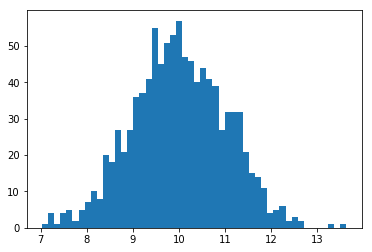

In [11]:
plt.hist(x,50)

Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки. Построить график зависимости (корелляции) x от y.

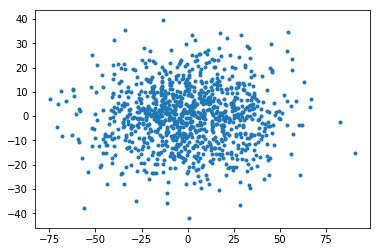

In [21]:
n = 25

X = np.vstack((x, y)).T
X = X - np.mean(X, 0)

scale = np.array([[n, 0], [0, n]])
new_matrix = X.dot(scale)   
plt.scatter(new_matrix[:, 0], new_matrix[:, 1], marker='.')



Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x. 

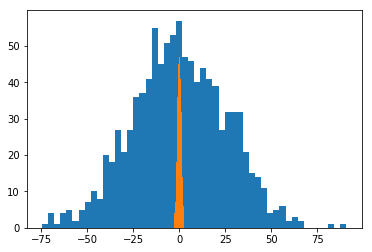

In [34]:
plt.hist(new_matrix[:, 0],50)
plt.hist(X[:, 0],50)
plt.show()

Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0? 

In [42]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(new_matrix[:,0], new_matrix[:,1])
print(corr)

#положительное значит прямую кореляцию, отрицательное - обратное, а 0 означает что кореляции вообще нет

0.023203743578472207


Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

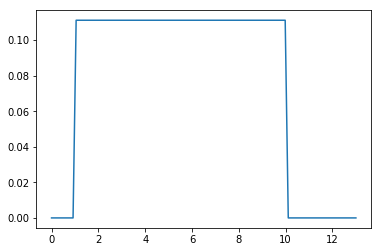

In [60]:
a = 1
b = 10

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

# uniform_rv.rvs(10)
x = np.linspace(0, 13, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

# В равномерном количество элементов на площади повсюдо равно
#а в равномерном есть концентрированные области и рассеяные( это если своими словами:) )

Найти на графике примеры выброса. Что они означают?  

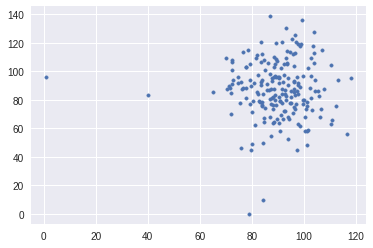

In [8]:
# Ошибки , необычная природа данных итд. Могут оказывать существенное влияние на результаты

Найти корелляцию в следующих данных: 

In [62]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932
5  0.000052  0.291815
6  0.000060  0.195730
7  0.000031  0.192171
8  0.000045  0.206406
9  0.000037  0.224199
-0.2083170484878848


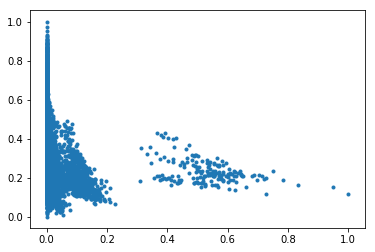

In [70]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:10])

number = df_norm[0]
av_price = df_norm[1]


corr, p_value = pearsonr(number, av_price)
plt.scatter(number, av_price, marker='.')

print(corr)